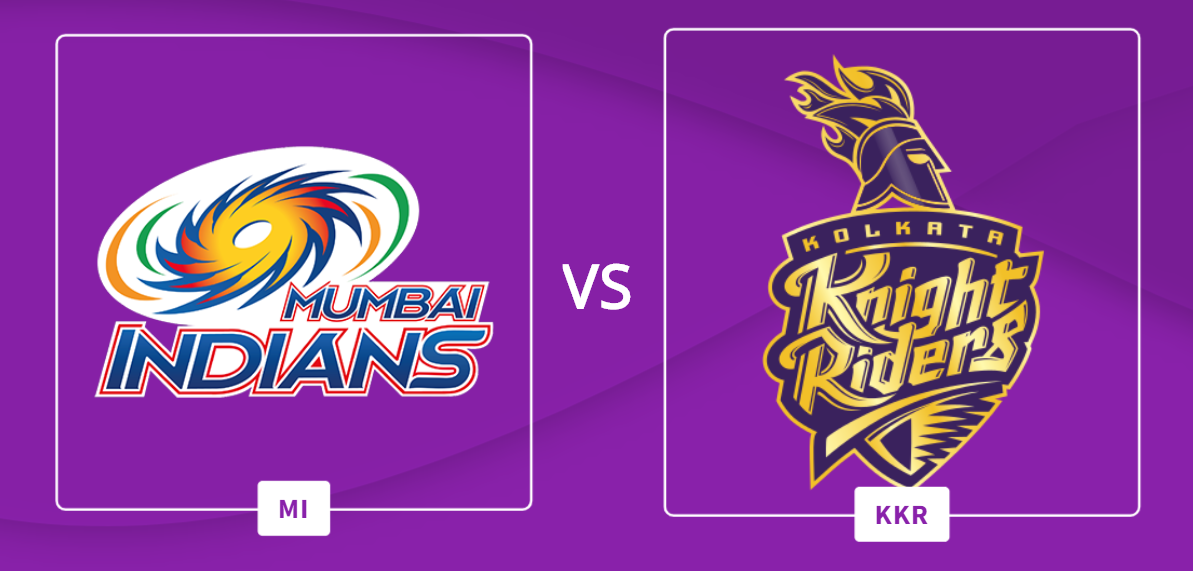

In [346]:
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 50)

In [347]:
matches = pd.read_csv("matches.csv")
deliveries =pd.read_csv("deliveries.csv")

# Teams 

In [348]:
#MI batsmen
MI_batsmen = ['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan Kishan', 'HH Pandya', 'KH Pandya', 'KA Pollard']

#MI bowlers
MI_bowlers = ['JJ Bumrah', 'TA Boult', 'RD Chahar', 'KH Pandya', 'KA Pollard']
#J Pattinson data not available

#KKR batsmen
KKR_batsmen = ['S Gill', 'RA Tripathi', 'N Rana', 'KD Karthik', 'EJG Morgan', 'AD Russell', 'PJ Cummins']

#KKR bowlers
KKR_bowlers = ['PJ Cummins',  'P Krishna', 'V Chakravarthy', 'AD Russell']
#nagarkoti not found

# Part 1 :How many wickets will MI lose in overs 6-15

In [349]:
IPL_KM = pd.read_csv("deliveries.csv")
IPL_KM.player_dismissed.fillna(0, inplace=True)
IPL_KM['player_dismissed'].loc[IPL_KM['dismissal_kind'] == 'run out'] = 0 #not counted in wickets of a bowler
IPL_KM['player_dismissed'].loc[IPL_KM['player_dismissed'] != 0] = 1

### wickets taking capability of KKR bowlers 

In [350]:
wickets_all = IPL_KM.groupby(['match_id','bowler'])['player_dismissed'].sum().reset_index()
MI_wickets = wickets_all[wickets_all.bowler.isin(KKR_bowlers)]
#for match,bowler, w in zip(MI_wickets.match_id.values,MI_wickets.bowler.values, MI_wickets.player_dismissed.values):
#    print("Wickets taken by ", bowler, " in match id: ", w) 

# Wickets taken by KKR bowlers in each match
MI_wickets_pc = MI_wickets[MI_wickets.bowler=='PJ Cummins'].reset_index()
MI_wickets_pk = MI_wickets[MI_wickets.bowler=='P Krishna'].reset_index()
MI_wickets_vc = MI_wickets[MI_wickets.bowler=='V Chakravarthy'].reset_index()
MI_wickets_ar = MI_wickets[MI_wickets.bowler=='AD Russell'].reset_index()

fig1 = px.bar(MI_wickets_pc, y='player_dismissed',
             hover_data=['player_dismissed'], color=MI_wickets_pc.player_dismissed,title='Wickets taken by PJ Cummins in a match')
fig1.show()

fig2 = px.bar(MI_wickets_pk, y='player_dismissed',
             hover_data=['player_dismissed'], color=MI_wickets_pk.player_dismissed,title='Wickets taken by P Krishna in a match')
fig2.show()

fig3 = px.bar(MI_wickets_vc, y='player_dismissed',
             hover_data=['player_dismissed'], color=MI_wickets_vc.player_dismissed,title='Wickets taken by V Chakravarthy in a match')
fig3.show()

fig4 = px.bar(MI_wickets_ar, y='player_dismissed',
             hover_data=['player_dismissed'], color=MI_wickets_ar.player_dismissed,title='Wickets taken by V AD Russell in a match')
fig4.show()

print("Statistics of wickets taken by PJ Cummins in a match :", MI_wickets_pc.player_dismissed.describe())
print("\nStatistics of wickets taken by P Krishna in a match :", MI_wickets_pk.player_dismissed.describe())
print("\nStatistics of wickets taken by V Chakravarthy in a match :", MI_wickets_vc.player_dismissed.describe())
print("\nStatistics of wickets taken by AD Russell in a match :", MI_wickets_ar.player_dismissed.describe())

Statistics of wickets taken by PJ Cummins in a match : count    16.000000
mean      1.062500
std       0.853913
min       0.000000
25%       0.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: player_dismissed, dtype: float64

Statistics of wickets taken by P Krishna in a match : count    18.000000
mean      0.777778
std       1.060275
min       0.000000
25%       0.000000
50%       0.500000
75%       1.000000
max       4.000000
Name: player_dismissed, dtype: float64

Statistics of wickets taken by V Chakravarthy in a match : count    1.0
mean     1.0
std      NaN
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0
Name: player_dismissed, dtype: float64

Statistics of wickets taken by AD Russell in a match : count    61.000000
mean      0.901639
std       1.028023
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       4.000000
Name: player_dismissed, dtype: float64


### wickets taking capability of KKR bowlers in middle overs

In [351]:
IPL_KM_mid = IPL_KM[(IPL_KM.over >= 6) & (IPL_KM.over <= 15)]
wickets_all_mid = IPL_KM_mid.groupby(['match_id','bowler'])['player_dismissed'].sum().reset_index()
MI_wickets_mid = wickets_all_mid[wickets_all_mid.bowler.isin(KKR_bowlers)]
 

# Wickets taken by KKR bowlers in each match in mid overs
MI_wickets_pc_mid = MI_wickets_mid[MI_wickets_mid.bowler=='PJ Cummins'].reset_index()
MI_wickets_pk_mid = MI_wickets_mid[MI_wickets_mid.bowler=='P Krishna'].reset_index()
MI_wickets_vc_mid = MI_wickets_mid[MI_wickets_mid.bowler=='V Chakravarthy'].reset_index()
MI_wickets_ar_mid = MI_wickets_mid[MI_wickets_mid.bowler=='AD Russell'].reset_index()

fig1_ = px.bar(MI_wickets_pc_mid, y='player_dismissed',
             hover_data=['player_dismissed'], color=MI_wickets_pc_mid.player_dismissed,title='Wickets taken by PJ Cummins in midovers')
fig1_.show()

fig2_ = px.bar(MI_wickets_pk_mid, y='player_dismissed',
             hover_data=['player_dismissed'], color=MI_wickets_pk_mid.player_dismissed,title='Wickets taken by P Krishna in midovers')
fig2_.show()

fig3_ = px.bar(MI_wickets_vc_mid, y='player_dismissed',
             hover_data=['player_dismissed'], color=MI_wickets_vc_mid.player_dismissed,title='Wickets taken by V Chakravarthy in midovers')
fig3_.show()

fig4_ = px.bar(MI_wickets_ar_mid, y='player_dismissed',
             hover_data=['player_dismissed'], color=MI_wickets_ar_mid.player_dismissed,title='Wickets taken by V AD Russell in midovers')
fig4_.show()

print("Statistics of wickets taken by PJ Cummins in midovers :", MI_wickets_pc_mid.player_dismissed.describe())
print("\nStatistics of wickets taken by P Krishna in midovers :", MI_wickets_pk_mid.player_dismissed.describe())
print("\nStatistics of wickets taken by V Chakravarthy in midovers :", MI_wickets_vc_mid.player_dismissed.describe())
print("\nStatistics of wickets taken by AD Russell in midovers :", MI_wickets_ar_mid.player_dismissed.describe())

Statistics of wickets taken by PJ Cummins in midovers : count    14.000000
mean      0.428571
std       0.513553
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: player_dismissed, dtype: float64

Statistics of wickets taken by P Krishna in midovers : count    12.000000
mean      0.083333
std       0.288675
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: player_dismissed, dtype: float64

Statistics of wickets taken by V Chakravarthy in midovers : count    1.0
mean     1.0
std      NaN
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0
Name: player_dismissed, dtype: float64

Statistics of wickets taken by AD Russell in midovers : count    48.000000
mean      0.520833
std       0.824868
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       3.000000
Name: player_dismissed, dtype: float64


### Wickets loosing capability of MI batsmen in middle overs against KKR bowlers

In [352]:
IPL_KM_mid = IPL_KM[(IPL_KM.over >= 6) & (IPL_KM.over <= 15)]
wickets_all_mid_ = IPL_KM_mid.groupby(['match_id','batsman','bowler'])['player_dismissed'].sum().reset_index()
MI_wickets_mid_ = wickets_all_mid_[(wickets_all_mid_.bowler.isin(KKR_bowlers)) & (wickets_all_mid_.batsman.isin(MI_batsmen))]# & (wickets_all_mid_.non_striker.isin(MI_batsmen))]
MI_wickets_mid_1 = MI_wickets_mid_.reset_index()
fig4_ = px.bar(MI_wickets_mid_1,y='player_dismissed',
             hover_data=['batsman','player_dismissed','match_id'], color=MI_wickets_mid_1.bowler,title='Wickets taken by KKR bowlers against MI batsmen in midovers')
fig4_.show()

In [353]:
# Wickets taken by KKR bowlers in each match in mid overs against MI batsmen
MI_wickets_pc_mid_ = MI_wickets_mid_[MI_wickets_mid_.bowler=='PJ Cummins'].reset_index()
MI_wickets_pk_mid_ = MI_wickets_mid_[MI_wickets_mid_.bowler=='P Krishna'].reset_index()
MI_wickets_vc_mid_ = MI_wickets_mid_[MI_wickets_mid_.bowler=='V Chakravarthy'].reset_index()
MI_wickets_ar_mid_ = MI_wickets_mid_[MI_wickets_mid_.bowler=='AD Russell'].reset_index()

print("Statistics of wickets taken by PJ Cummins in midovers :", MI_wickets_pc_mid_)
print("\nStatistics of wickets taken by P Krishna in midovers :", MI_wickets_pk_mid_)
print("\nStatistics of wickets taken by V Chakravarthy in midovers :", MI_wickets_vc_mid_)
print("\nStatistics of wickets taken by AD Russell in midovers :", MI_wickets_ar_mid_)

Statistics of wickets taken by PJ Cummins in midovers :    index  match_id       batsman      bowler  player_dismissed
0    689        24    KA Pollard  PJ Cummins                 0
1    693        24     KH Pandya  PJ Cummins                 0
2    701        24     RG Sharma  PJ Cummins                 0
3   1139        41  Ishan Kishan  PJ Cummins                 0
4   1226        44    KA Pollard  PJ Cummins                 0
5   1368        49  Ishan Kishan  PJ Cummins                 0

Statistics of wickets taken by P Krishna in midovers :    index  match_id       batsman     bowler  player_dismissed
0  18583      7934  Ishan Kishan  P Krishna                 0
1  18596      7934     RG Sharma  P Krishna                 0
2  20633     11347     Q de Kock  P Krishna                 1
3  20637     11347     RG Sharma  P Krishna                 0

Statistics of wickets taken by V Chakravarthy in midovers : Empty DataFrame
Columns: [index, match_id, batsman, bowler, player_dismissed

In [354]:
wickets_avg_mid = MI_wickets_pc_mid.player_dismissed.mean() + MI_wickets_pk_mid.player_dismissed.mean() + MI_wickets_vc_mid.player_dismissed.mean() + MI_wickets_ar_mid.player_dismissed.mean()
wickets_avg_mid_ = MI_wickets_pc_mid_.player_dismissed.mean() + MI_wickets_pk_mid_.player_dismissed.mean() + MI_wickets_ar_mid_.player_dismissed.mean()
print("Wickets taken will be in the range: ",wickets_avg_mid_, " - ",wickets_avg_mid)

Wickets taken will be in the range:  0.25  -  2.0327380952380953


# Conclusion: MI will loose 0-2 wickets in the middle overs

###############################################################################################################################
# Part2: How many 4s will be hit by KKR in the match

### 4s hitting capability of KKR batsmen in general

In [355]:
KKR_bats  = deliveries[deliveries.batsman.isin(KKR_batsmen)]
KKR_fours  = KKR_bats[KKR_bats.batsman_runs == 4]
KKR_fours_ = KKR_fours.groupby(['match_id', 'batsman'])['batsman_runs'].count().reset_index(name = "no_of_fours")

# 4s hit by KKR batsmen in each match
KKR_fours_SG = KKR_fours_[KKR_fours_.batsman =="S Gill"].reset_index()
KKR_fours_RT = KKR_fours_[KKR_fours_.batsman =="RA Tripathi"].reset_index()
KKR_fours_NR = KKR_fours_[KKR_fours_.batsman =="N Rana"].reset_index()
KKR_fours_KK = KKR_fours_[KKR_fours_.batsman =="KD Karthik"].reset_index()
KKR_fours_EM = KKR_fours_[KKR_fours_.batsman =="EJG Morgan"].reset_index()
KKR_fours_AR = KKR_fours_[KKR_fours_.batsman =="AD Russell"].reset_index()
KKR_fours_PC = KKR_fours_[KKR_fours_.batsman =="PJ Cummins"].reset_index()

f1 = px.bar(KKR_fours_SG, y='no_of_fours',
             hover_data=['match_id','no_of_fours'], color=KKR_fours_SG.no_of_fours,title='4s hit by S Gill in a match')
f1.show()

f2 = px.bar(KKR_fours_RT, y='no_of_fours',
             hover_data=['match_id','no_of_fours'], color=KKR_fours_RT.no_of_fours,title='4s hit by RA Tripathi in a match')
f2.show()

f3 = px.bar(KKR_fours_NR, y='no_of_fours',
             hover_data=['match_id','no_of_fours'], color=KKR_fours_NR.no_of_fours,title='4s hit by N Rana in a match')
f3.show()

f4 = px.bar(KKR_fours_KK, y='no_of_fours',
             hover_data=['match_id','no_of_fours'], color=KKR_fours_KK.no_of_fours,title='4s hit by KD Karthik in a match')
f4.show()

f5 = px.bar(KKR_fours_EM, y='no_of_fours',
             hover_data=['match_id','no_of_fours'], color=KKR_fours_EM.no_of_fours,title='4s hit by EJG Morgan in a match')
f5.show()

f6 = px.bar(KKR_fours_AR, y='no_of_fours',
             hover_data=['match_id','no_of_fours'], color=KKR_fours_AR.no_of_fours,title='4s hit by AD Russell in a match')
f6.show()

f7 = px.bar(KKR_fours_PC, y='no_of_fours',
             hover_data=['match_id','no_of_fours'], color=KKR_fours_PC.no_of_fours,title='4s hit by P Cummins in a match')
f7.show()

print("Average of 4s hit by S Gill in a match:", KKR_fours_SG.no_of_fours.mean())
print("\nAverage of 4s hit by RA Tripathi in a match :", KKR_fours_RT.no_of_fours.mean())
print("\nAverage of 4s hit by N Rana in a match :", KKR_fours_NR.no_of_fours.mean())
print("\nAverage of 4s hit by KD Karthik in a match :", KKR_fours_KK.no_of_fours.mean())
print("\nAverage of 4s hit by EJG Morgan in a match :", KKR_fours_EM.no_of_fours.mean())
print("\nAverage of 4s hit by AD Russell in a match :", KKR_fours_AR.no_of_fours.mean())
print("\nAverage of 4s hit by P Cummins in a match :", KKR_fours_PC.no_of_fours.mean())


print("\n\nTotal number od boundries by KKR batsmen", KKR_fours_SG.no_of_fours.mean() + KKR_fours_RT.no_of_fours.mean() + KKR_fours_NR.no_of_fours.mean() + KKR_fours_KK.no_of_fours.mean() + KKR_fours_EM.no_of_fours.mean() + KKR_fours_AR.no_of_fours.mean() + KKR_fours_PC.no_of_fours.mean())

Average of 4s hit by S Gill in a match: 3.0

Average of 4s hit by RA Tripathi in a match : 3.0416666666666665

Average of 4s hit by N Rana in a match : 2.7419354838709675

Average of 4s hit by KD Karthik in a match : 2.9833333333333334

Average of 4s hit by EJG Morgan in a match : 2.4827586206896552

Average of 4s hit by AD Russell in a match : 2.8

Average of 4s hit by P Cummins in a match : 1.6666666666666667


Total number od boundries by KKR batsmen 18.71636077122729


## 4s hitting capability of KKR batsmen agains MI bowlers

In [356]:
# when bowlers are MI bowlers
fours_KM = KKR_fours[KKR_fours.bowler.isin(MI_bowlers)]
KKR_fours_M = fours_KM.groupby(['match_id', 'batsman'])['batsman_runs'].count().reset_index(name = "no_of_fours")
KKR_fours_M.batsman.unique()

array(['KD Karthik', 'N Rana', 'AD Russell', 'S Gill'], dtype=object)

In [357]:
#KKR_fours  = KKR_bats[KKR_bats.batsman_runs == 4]
# 4s hit by KKR batsmen in each match
KKR_fours_SG_ = KKR_fours_M[KKR_fours_M.batsman =="S Gill"].reset_index()
KKR_fours_KK_ = KKR_fours_M[KKR_fours_M.batsman =="KD Karthik"].reset_index()
KKR_fours_AR_ = KKR_fours_M[KKR_fours_M.batsman =="AD Russell"].reset_index()
KKR_fours_NR_ = KKR_fours_M[KKR_fours_M.batsman =="N Rana"].reset_index()

f1_ = px.bar(KKR_fours_SG_, y='no_of_fours',
             hover_data=['match_id','no_of_fours'], color=KKR_fours_SG_.no_of_fours,title='4s hit by S Gill in a match against MI bowlers')
f1_.show()



f4_ = px.bar(KKR_fours_KK_, y='no_of_fours',
             hover_data=['match_id','no_of_fours'], color=KKR_fours_KK_.no_of_fours,title='4s hit by KD Karthik in a match against MI bowlers')
f4_.show()

f6_ = px.bar(KKR_fours_AR_, y='no_of_fours',
             hover_data=['match_id','no_of_fours'], color=KKR_fours_AR_.no_of_fours,title='4s hit by AD Russell in a match against MI bowlers')
f6_.show()

f7_ = px.bar(KKR_fours_NR_, y='no_of_fours',
             hover_data=['match_id','no_of_fours'], color=KKR_fours_NR_.no_of_fours,title='4s hit by N Rana in a match against MI bowlers')
f7_.show()

print("Average of 4s hit by S Gill in a match against MI bowlers:", KKR_fours_SG_.no_of_fours.mean())
print("\nAverage of 4s hit by KD Karthik in a match against MI bowlers :", KKR_fours_KK_.no_of_fours.mean())
print("\nAverage of 4s hit by AD Russell in a match against MI bowlers:", KKR_fours_AR_.no_of_fours.mean())
print("\nAverage of 4s hit by N Ranain a match against MI bowlers:", KKR_fours_NR_.no_of_fours.mean())

Average of 4s hit by S Gill in a match against MI bowlers: 1.0

Average of 4s hit by KD Karthik in a match against MI bowlers : 2.142857142857143

Average of 4s hit by AD Russell in a match against MI bowlers: 2.0

Average of 4s hit by N Ranain a match against MI bowlers: 1.0


## 4s hit on the venue Sheikh Zayed Stadium 

In [358]:
IPL_data = pd.merge(deliveries, matches[['id','season', 'venue', 'toss_winner', 'toss_decision','winner','win_by_runs','win_by_wickets' ]], 
                    left_on='match_id', right_on='id')
matches_SZS = IPL_data[IPL_data.venue == "Sheikh Zayed Stadium"]

In [359]:
matches_SZS_fours = matches_SZS[matches_SZS.batsman_runs == 4]
SZS_fours = matches_SZS_fours.groupby(['match_id', 'inning'])['batsman_runs'].count().reset_index(name = "number_of_fours")
print("Number of matches played at Sheikh Zayed Stadium are :", matches_SZS.shape[0], "\n\nNumber of 4s hit (matchwise) at Sheikh Zayed are :", SZS_fours)

Number of matches played at Sheikh Zayed Stadium are : 1624 

Number of 4s hit (matchwise) at Sheikh Zayed are :     match_id  inning  number_of_fours
0        458       1               14
1        458       2                7
2        460       1               15
3        460       2               26
4        461       1                6
5        461       2               14
6        465       1               14
7        465       2                7
8        471       1                6
9        471       2                6
10       472       1               12
11       472       2               10
12       476       1               17
13       476       2               12
14       476       4                1


In [360]:
# Number of 4s hit by KKR team at this stadium
matches_SZS_KKR = matches_SZS[matches_SZS.batting_team == "Kolkata Knight Riders"]
SZS_KKR_fours = matches_SZS_KKR[matches_SZS_KKR.batsman_runs == 4]
SZS_KKR_fours_ = SZS_KKR_fours.groupby(['match_id','batsman'])['batsman_runs'].count().reset_index(name = "fours_by_kkr")
SZS_KKR_fours_

,match_id,batsman,fours_by_kkr
0,458,JH Kallis,5
1,458,MK Pandey,6
2,458,SA Yadav,3
3,472,CA Lynn,2
4,472,JH Kallis,2
5,472,MK Pandey,1
6,472,RV Uthappa,2
7,472,SA Yadav,3
8,476,G Gambhir,4
9,476,JH Kallis,1


In [361]:
k = px.bar(SZS_KKR_fours_, y='fours_by_kkr',
             hover_data=['match_id','fours_by_kkr'], color=SZS_KKR_fours_.fours_by_kkr,title='4s hit by KKR ar Sheikh Zayed Stadium')
k.show()

## Number of 4s by KKR batsmen at Sheikh Zayed stadium are

In [362]:
SZS_KKR_fours_b = matches_SZS[matches_SZS.batsman.isin(KKR_batsmen)]
SZS_KKR_fours_b_ = SZS_KKR_fours_b[SZS_KKR_fours_b.batsman_runs == 4]

SZS_KKR_b_ = SZS_KKR_fours_b_.groupby(['match_id','batsman'])['batsman_runs'].count().reset_index(name = "venuewise_kkr_batsmen_fours")
SZS_KKR_b_

,match_id,batsman,venuewise_kkr_batsmen_fours
0,465,KD Karthik,2


## Only KD karthik who played at this Venue hit 2 fours so far

In [363]:

AVg_4s = KKR_fours_SG.no_of_fours.mean() + KKR_fours_RT.no_of_fours.mean() + KKR_fours_NR.no_of_fours.mean() + KKR_fours_KK.no_of_fours.mean() + KKR_fours_EM.no_of_fours.mean() + KKR_fours_AR.no_of_fours.mean() + KKR_fours_PC.no_of_fours.mean()
Avg_4s_KKR = KKR_fours_SG_.no_of_fours.mean() + KKR_fours_KK_.no_of_fours.mean() +KKR_fours_AR_.no_of_fours.mean() + KKR_fours_NR_.no_of_fours.mean()
print("4s hit by KKR in range: ",Avg_4s_KKR,"-", AVg_4s)


4s hit by KKR in range:  6.142857142857142 - 18.71636077122729


# Conclusion:  4s hit by KKR will be 13 or more today

###############################################################################################################################
# Part 3:  How many runs will be scored today

In [364]:
IPL_data_ = pd.merge(deliveries, matches[['id','season', 'team1', 'team2', 'toss_winner', 'toss_decision','winner','result', 'dl_applied','win_by_runs','win_by_wickets', 'venue' ]], 
                    left_on='match_id', right_on='id')
IPL_data_.player_dismissed.fillna(0, inplace=True)

IPL_data_['player_dismissed'].loc[IPL_data_['player_dismissed'] != 0] = 1

IPL_data_train = IPL_data_.groupby(['match_id', 'inning', 'over','toss_winner', 'toss_decision', 'batting_team','bowling_team','bowler','batsman','winner', 'venue'])[['wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs','batsman_runs', 'extra_runs','total_runs', 'player_dismissed']].agg(['sum']).reset_index()

IPL_data_train.columns = IPL_data_train.columns.get_level_values(0)

matches_SZS_runs = IPL_data_train[IPL_data_train.venue == "Sheikh Zayed Stadium"]

# innings score and wickets #
matches_SZS_runs['innings_wickets'] = matches_SZS_runs.groupby(['match_id', 'inning'])['player_dismissed'].cumsum()
matches_SZS_runs['innings_score'] = matches_SZS_runs.groupby(['match_id', 'inning'])['total_runs'].cumsum()




In [365]:
t = matches_SZS_runs[matches_SZS_runs.match_id == 476]
t.innings_score.values

array([  7,   7,  11,  13,  14,  14,  15,  23,  24,  25,  26,  45,  48,
        49,  52,  53,  55,  57,  57,  62,  63,  68,  73,  74,  77,  80,
        82,  85,  99, 101, 106, 117, 118, 127, 129, 133, 133, 134, 143,
       144, 146, 152,   5,   7,  12,  12,  19,  20,  21,  21,  21,  29,
        30,  31,  33,  35,  38,  39,  46,  49,  50,  56,  59,  63,  65,
        69,  73,  74,  85,  86,  88,  92, 100, 101, 110, 111, 124, 126,
       128, 137, 137, 137, 137, 137, 141, 143, 152,   8,   9,  11,   5,
        11], dtype=int64)

In [366]:
# Total score and wickets(including run outs) of a inning per match
IPL_Scores  = matches_SZS_runs.groupby(['match_id','inning'])['innings_wickets','innings_score'].max().reset_index()
IPL_Scores

,match_id,inning,innings_wickets,innings_score
0,458,1,5,163
1,458,2,7,122
2,460,1,4,205
3,460,2,4,206
4,461,1,6,133
5,461,2,6,135
6,465,1,7,177
7,465,2,9,84
8,471,1,10,70
9,471,2,4,71


### Possible Score in todays match by MI batsmen

In [367]:
MI_br = IPL_data_[IPL_data_.batsman.isin(MI_batsmen)]
MI_balls = MI_br.groupby(['match_id','batsman'])['batsman_runs'].count().reset_index(name = "balls_faced")
MI_runs = MI_br.groupby(['match_id','batsman'])['batsman_runs'].sum().reset_index(name = "batsman_runs")
MI_balls["batsman_runs"] = MI_runs.batsman_runs.values
MI_balls.batsman.unique()

array(['HH Pandya', 'KA Pollard', 'KH Pandya', 'RG Sharma', 'SA Yadav',
       'Ishan Kishan', 'Q de Kock'], dtype=object)

In [368]:
MI_HP = MI_balls[MI_balls.batsman == 'HH Pandya']
MI_KP = MI_balls[MI_balls.batsman == 'KA Pollard']
MI_KHP = MI_balls[MI_balls.batsman == 'KH Pandya']
MI_RS = MI_balls[MI_balls.batsman == 'RG Sharma']
MI_SY = MI_balls[MI_balls.batsman == 'SA Yadav']
MI_IK = MI_balls[MI_balls.batsman == 'Ishan Kishan']
MI_QK = MI_balls[MI_balls.batsman == 'Q de Kock']

a1 = px.bar(MI_HP, x = 'balls_faced',y='batsman_runs',
             hover_data=['match_id','batsman_runs'], color=MI_HP.batsman_runs, title='Balls faced and Runs scored by HH Pandya')
a1.show()

a2 = px.bar(MI_KP, x = 'balls_faced',y='batsman_runs',
             hover_data=['match_id','batsman_runs'], color=MI_KP.batsman_runs, title='Balls faced and Runs scored by KA Pollard')
a2.show()

a2 = px.bar(MI_KHP, x = 'balls_faced',y='batsman_runs',
             hover_data=['match_id','batsman_runs'], color=MI_KHP.batsman_runs, title='Balls faced and Runs scored by KH Pandya')
a2.show()

a3 = px.bar(MI_RS, x = 'balls_faced',y='batsman_runs',
             hover_data=['match_id','batsman_runs'], color=MI_RS.batsman_runs, title='Balls faced and Runs scored by RG Sharma')
a3.show()

a4 = px.bar(MI_SY, x = 'balls_faced',y='batsman_runs',
             hover_data=['match_id','batsman_runs'], color=MI_SY.batsman_runs, title='Balls faced and Runs scored by SA Yadav')
a4.show()

a5 = px.bar(MI_IK, x = 'balls_faced',y='batsman_runs',
             hover_data=['match_id','batsman_runs'], color=MI_IK.batsman_runs, title='Balls faced and Runs scored by Ishan Kishan')
a5.show()

a6 = px.bar(MI_QK, x = 'balls_faced',y='batsman_runs',
             hover_data=['match_id','batsman_runs'], color=MI_QK.batsman_runs, title='Balls faced and Runs scored by Q de Kock')
a6.show()

In [369]:
print('\nHH Pandya balls faced average: ',MI_HP.balls_faced.describe())
print('\nKA Pollard balls faced average: ',MI_KP.balls_faced.describe())
print('\nKH Pandya balls faced average: ',MI_KHP.balls_faced.describe())
print('\nRG Sharma balls faced average: ',MI_RS.balls_faced.describe())
print('\nSA Yadav balls faced average: ',MI_SY.balls_faced.describe())
print('\nIshan Kishan balls faced average: ',MI_IK.balls_faced.describe())
print('\nQ de Kock balls faced average: ',MI_QK.balls_faced.describe())


HH Pandya balls faced average:  count    61.000000
mean     12.065574
std       8.748083
min       1.000000
25%       5.000000
50%      11.000000
75%      17.000000
max      45.000000
Name: balls_faced, dtype: float64

KA Pollard balls faced average:  count    132.000000
mean      14.878788
std        9.977861
min        1.000000
25%        8.000000
50%       12.500000
75%       20.000000
max       50.000000
Name: balls_faced, dtype: float64

KH Pandya balls faced average:  count    46.000000
mean     13.804348
std      10.603185
min       1.000000
25%       5.250000
50%      12.000000
75%      20.000000
max      41.000000
Name: balls_faced, dtype: float64

RG Sharma balls faced average:  count    182.000000
mean      20.967033
std       15.151865
min        1.000000
25%        8.250000
50%       18.000000
75%       31.000000
max       66.000000
Name: balls_faced, dtype: float64

SA Yadav balls faced average:  count    42.000000
mean     11.404762
std       9.793127
min       1.000000

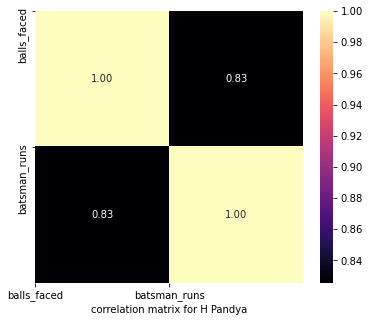

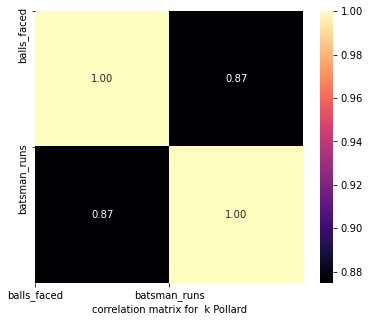

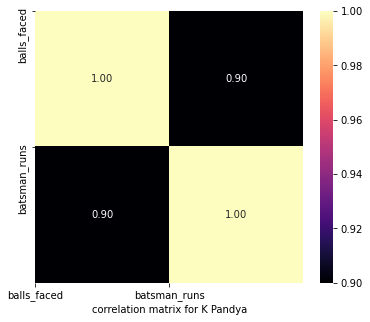

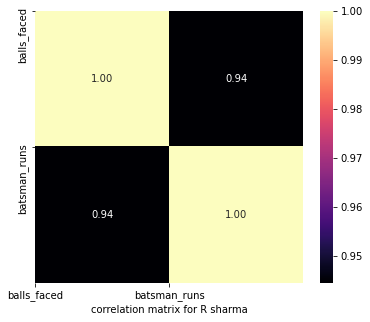

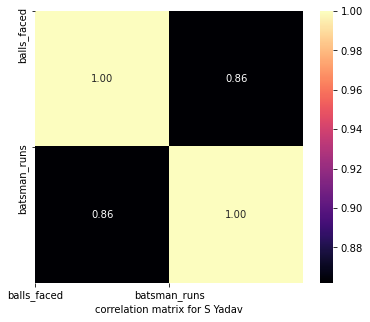

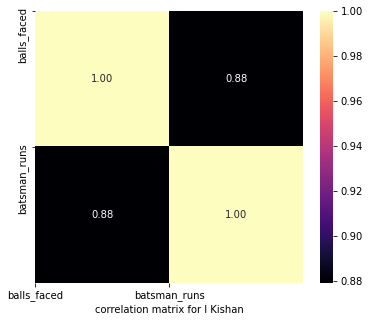

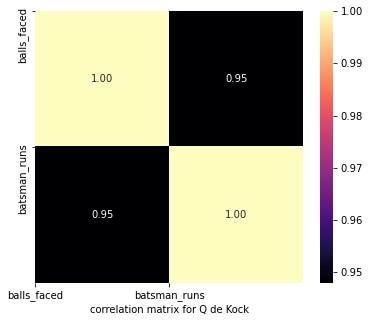

In [370]:
MI_HP["match_id"]= MI_HP["match_id"].astype(str)
MI_KP["match_id"]= MI_KP["match_id"].astype(str)
MI_KHP["match_id"]= MI_KHP["match_id"].astype(str)
MI_RS["match_id"]= MI_RS["match_id"].astype(str)
MI_SY["match_id"]= MI_SY["match_id"].astype(str)
MI_IK["match_id"]= MI_IK["match_id"].astype(str)
MI_QK["match_id"]= MI_QK["match_id"].astype(str)

# Linear regression
corr1 = MI_HP.corr()
corr2 = MI_KP.corr()
corr3 = MI_KHP.corr()
corr4 = MI_RS.corr()
corr5 = MI_SY.corr()
corr6 = MI_IK.corr()
corr7 = MI_QK.corr()



fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(corr1, cmap='magma', annot=True, fmt=".2f")
plt.xticks(range(len(corr1.columns)), corr1.columns);
plt.yticks(range(len(corr1.columns)), corr1.columns)
plt.xlabel("correlation matrix for H Pandya")
plt.show()

fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(corr2, cmap='magma', annot=True, fmt=".2f")
plt.xticks(range(len(corr2.columns)), corr2.columns);
plt.yticks(range(len(corr2.columns)), corr2.columns)
plt.xlabel("correlation matrix for  k Pollard")
plt.show()

fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(corr3, cmap='magma', annot=True, fmt=".2f")
plt.xticks(range(len(corr3.columns)), corr3.columns);
plt.yticks(range(len(corr3.columns)), corr3.columns)
plt.xlabel("correlation matrix for K Pandya")
plt.show()

fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(corr4, cmap='magma', annot=True, fmt=".2f")
plt.xticks(range(len(corr4.columns)), corr4.columns);
plt.yticks(range(len(corr4.columns)), corr4.columns)
plt.xlabel("correlation matrix for R sharma")
plt.show()

fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(corr5, cmap='magma', annot=True, fmt=".2f")
plt.xticks(range(len(corr5.columns)), corr5.columns);
plt.yticks(range(len(corr5.columns)), corr5.columns)
plt.xlabel("correlation matrix for S Yadav")
plt.show()

fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(corr6, cmap='magma', annot=True, fmt=".2f")
plt.xticks(range(len(corr6.columns)), corr6.columns);
plt.yticks(range(len(corr6.columns)), corr6.columns)
plt.xlabel("correlation matrix for I Kishan")
plt.show()

fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(corr7, cmap='magma', annot=True, fmt=".2f")
plt.xticks(range(len(corr7.columns)), corr7.columns);
plt.yticks(range(len(corr7.columns)), corr7.columns)
plt.xlabel("correlation matrix for Q de Kock")
plt.show()


### regression model for H Pandya

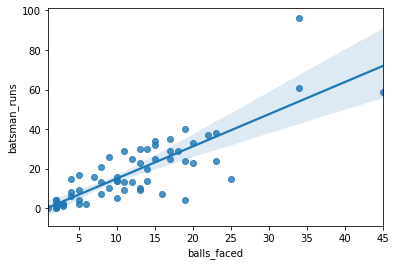

In [371]:
import statsmodels.formula.api as smf
model1 = smf.ols("batsman_runs~balls_faced",data = MI_HP).fit()
sns.regplot(x="balls_faced", y="batsman_runs", data=MI_HP);

### regression model for K Pillard

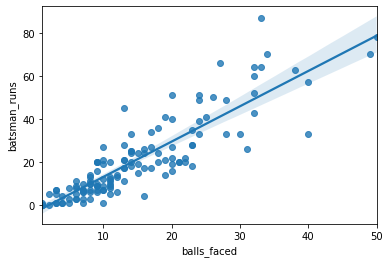

In [372]:
model2 = smf.ols("batsman_runs~balls_faced",data = MI_KP).fit()
sns.regplot(x="balls_faced", y="batsman_runs", data=MI_KP);

### regression mode for KH Pandya

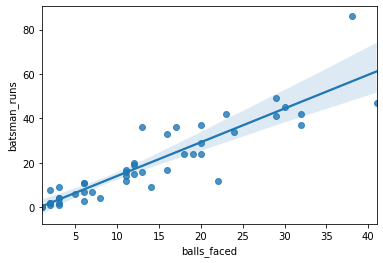

In [373]:
model3 = smf.ols("batsman_runs~balls_faced",data = MI_KHP).fit()
sns.regplot(x="balls_faced", y="batsman_runs", data=MI_KHP);

### regression mode for RG Sharma

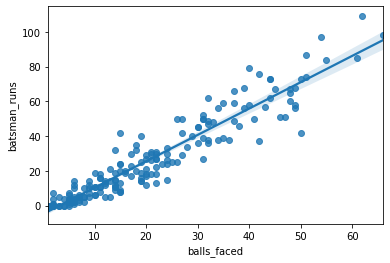

In [374]:
model4 = smf.ols("batsman_runs~balls_faced",data = MI_RS).fit()
sns.regplot(x="balls_faced", y="batsman_runs", data=MI_RS);

### regression mode for S Yadav

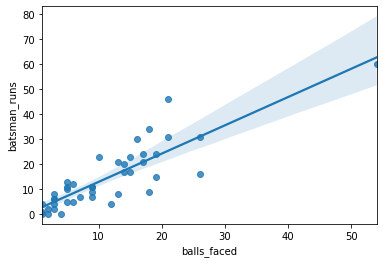

In [375]:
model5 = smf.ols("batsman_runs~balls_faced",data = MI_SY).fit()
sns.regplot(x="balls_faced", y="batsman_runs", data=MI_SY);

### regression mode for I kishan

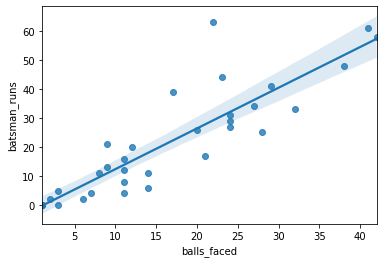

In [376]:
model6 = smf.ols("batsman_runs~balls_faced",data = MI_IK).fit()
sns.regplot(x="balls_faced", y="batsman_runs", data=MI_IK);

### regression mode for Q de Kock

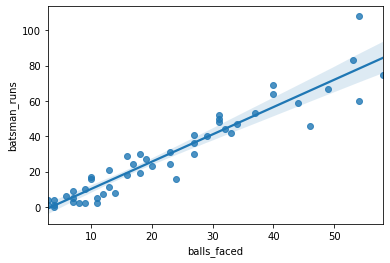

In [377]:
model7 = smf.ols("batsman_runs~balls_faced",data = MI_QK).fit()
sns.regplot(x="balls_faced", y="batsman_runs", data=MI_QK);

In [378]:
#R squared values
print("model1:",(model1.rsquared,model1.rsquared_adj))
print("model2:",(model2.rsquared,model2.rsquared_adj))
print("model3:",(model3.rsquared,model3.rsquared_adj))
print("model4:",(model4.rsquared,model4.rsquared_adj))
print("model5:",(model5.rsquared,model5.rsquared_adj))
print("model6:",(model6.rsquared,model6.rsquared_adj))
print("model7:",(model7.rsquared,model7.rsquared_adj))



model1: (0.6815927659669176, 0.6761960331866959)
model2: (0.7653638660263384, 0.7635589726880795)
model3: (0.8099523748704802, 0.8056331106629911)
model4: (0.8921356403311177, 0.8915363938885128)
model5: (0.7430462137093483, 0.7366223690520821)
model6: (0.7727156427450729, 0.7653838892852365)
model7: (0.8985842738515402, 0.8964714462234472)


In [379]:
# prediction for new values

p_runs1 = pd.Series([12,17])
p_runs2 = pd.Series([14,20])
p_runs3 = pd.Series([13,20])
p_runs4 = pd.Series([20,31])
p_runs5 = pd.Series([11,16])
p_runs6 = pd.Series([16,24])
p_runs7 = pd.Series([22,31])

data_pred_MI = pd.DataFrame(p_runs1,columns=['balls_faced'])
data_pred_MI["Expected_runs_by_H_Pandya"] = model1.predict(data_pred_MI)

data_pred_KP = pd.DataFrame(p_runs2,columns=['balls_faced'])
data_pred_KP["Expected_runs_by_K_Pollard"] = model2.predict(data_pred_KP)

data_pred_KHP = pd.DataFrame(p_runs3,columns=['balls_faced'])
data_pred_KHP["Expected_runs_by_K_Pandya"] = model3.predict(data_pred_KHP)

data_pred_RS = pd.DataFrame(p_runs4,columns=['balls_faced'])
data_pred_RS["Expected_runs_by_RG_Sharma"] = model4.predict(data_pred_RS)

data_pred_SY = pd.DataFrame(p_runs5,columns=['balls_faced'])
data_pred_SY["Expected_runs_by_S_Yadav"] = model5.predict(data_pred_SY)

data_pred_IK = pd.DataFrame(p_runs6,columns=['balls_faced'])
data_pred_IK["Expected_runs_by_I_Kishan"] = model6.predict(data_pred_IK)

data_pred_QK = pd.DataFrame(p_runs7,columns=['balls_faced'])
data_pred_QK["Expected_runs_by_Q_de_kock"] = model7.predict(data_pred_QK)

print("possible runs scoed by MI batsmen:", "\n\n",data_pred_MI, "\n\n",data_pred_KP, "\n\n",data_pred_KHP, "\n\n",data_pred_RS, "\n\n",data_pred_IK, "\n\n",data_pred_QK)

possible runs scoed by MI batsmen: 

    balls_faced  Expected_runs_by_H_Pandya
0           12                  18.221096
1           17                  26.362554 

    balls_faced  Expected_runs_by_K_Pollard
0           14                   19.648452
1           20                   29.496952 

    balls_faced  Expected_runs_by_K_Pandya
0           13                  18.669335
1           20                  29.303771 

    balls_faced  Expected_runs_by_RG_Sharma
0           20                    25.53306
1           31                    42.21950 

    balls_faced  Expected_runs_by_I_Kishan
0           16                  20.780237
1           24                  32.003424 

    balls_faced  Expected_runs_by_Q_de_kock
0           22                   28.663453
1           31                   42.620293


### Possible score by KKR batsmen in today's match

In [380]:
KKR_batsmen


['S Gill',
 'RA Tripathi',
 'N Rana',
 'KD Karthik',
 'EJG Morgan',
 'AD Russell',
 'PJ Cummins']

In [381]:
KKR_br = IPL_data_[IPL_data_.batsman.isin(KKR_batsmen)]
KKR_balls = KKR_br.groupby(['match_id','batsman'])['batsman_runs'].count().reset_index(name = "balls_faced")
KKR_runs = KKR_br.groupby(['match_id','batsman'])['batsman_runs'].sum().reset_index(name = "batsman_runs")
KKR_balls["batsman_runs"] = KKR_runs.batsman_runs.values
KKR_balls.batsman.unique()
NR = KKR_balls[KKR_balls.batsman == 'N Rana']
KDK = KKR_balls[KKR_balls.batsman == 'KD Karthik']
PC = KKR_balls[KKR_balls.batsman == 'PJ Cummins']
RT = KKR_balls[KKR_balls.batsman == 'RA Tripathi']
EM = KKR_balls[KKR_balls.batsman == 'EJG Morgan']
AR = KKR_balls[KKR_balls.batsman == 'AD Russell']
SG = KKR_balls[KKR_balls.batsman == 'S Gill']

In [382]:


a1_ = px.bar(NR, x = 'balls_faced',y='batsman_runs',
             hover_data=['match_id','batsman_runs'], color=NR.batsman_runs, title='Balls faced and Runs scored by N Rana')
a1_.show()

a2_ = px.bar(KDK, x = 'balls_faced',y='batsman_runs',
             hover_data=['match_id','batsman_runs'], color=KDK.batsman_runs, title='Balls faced and Runs scored by KD Karthik')
a2_.show()

a2_ = px.bar(PC, x = 'balls_faced',y='batsman_runs',
             hover_data=['match_id','batsman_runs'], color=PC.batsman_runs, title='Balls faced and Runs scored by P Cummins')
a2_.show()

a3_ = px.bar(RT, x = 'balls_faced',y='batsman_runs',
             hover_data=['match_id','batsman_runs'], color=RT.batsman_runs, title='Balls faced and Runs scored by R Tripathi')
a3_.show()

a4_ = px.bar(EM, x = 'balls_faced',y='batsman_runs',
             hover_data=['match_id','batsman_runs'], color=EM.batsman_runs, title='Balls faced and Runs scored by E Morgan')
a4_.show()

a5_ = px.bar(AR, x = 'balls_faced',y='batsman_runs',
             hover_data=['match_id','batsman_runs'], color=AR.batsman_runs, title='Balls faced and Runs scored by A Russell')
a5_.show()

a6_ = px.bar(SG, x = 'balls_faced',y='batsman_runs',
             hover_data=['match_id','batsman_runs'], color=SG.batsman_runs, title='Balls faced and Runs scored by S Gill')
a6_.show()

print('\n N Rana balls faced average: ',NR.balls_faced.describe())
print('\nKD Karthik balls faced average: ',KDK.balls_faced.describe())
print('\nP cummins balls faced average: ',PC.balls_faced.describe())
print('\nR Tripathi balls faced average: ',RT.balls_faced.describe())
print('\nE Morgan balls faced average: ',EM.balls_faced.describe())
print('\nA Russell balls faced average: ',AR.balls_faced.describe())
print('\nS Gill balls faced average: ',SG.balls_faced.describe())


 N Rana balls faced average:  count    41.000000
mean     20.365854
std      12.573297
min       2.000000
25%      11.000000
50%      16.000000
75%      29.000000
max      49.000000
Name: balls_faced, dtype: float64

KD Karthik balls faced average:  count    162.000000
mean      17.839506
std       12.402120
min        1.000000
25%        6.000000
50%       17.000000
75%       27.000000
max       52.000000
Name: balls_faced, dtype: float64

P cummins balls faced average:  count     9.000000
mean      6.222222
std       3.456074
min       2.000000
25%       4.000000
50%       6.000000
75%       7.000000
max      13.000000
Name: balls_faced, dtype: float64

R Tripathi balls faced average:  count    33.000000
mean     17.303030
std      15.021828
min       2.000000
25%       7.000000
50%      12.000000
75%      24.000000
max      61.000000
Name: balls_faced, dtype: float64

E Morgan balls faced average:  count    45.000000
mean     16.111111
std      11.830666
min       1.000000
25%     

In [383]:
## Regression


NR["match_id"]= NR["match_id"].astype(str)
KDK["match_id"]= KDK["match_id"].astype(str)
PC["match_id"]= PC["match_id"].astype(str)
RT["match_id"]= RT["match_id"].astype(str)
EM["match_id"]= EM["match_id"].astype(str)
AR["match_id"]= AR["match_id"].astype(str)
SG["match_id"]= MI_QK["match_id"].astype(str)

# Linear regression
c1 = NR.corr()
c2 = KDK.corr()
c3 = PC.corr()
c4 = RT.corr()
c5 = EM.corr()
c6 = AR.corr()
c7 = SG.corr()

model1 = smf.ols("batsman_runs~balls_faced",data = NR).fit()
model2 = smf.ols("batsman_runs~balls_faced",data = KDK).fit()
model3 = smf.ols("batsman_runs~balls_faced",data = PC).fit()
model4 = smf.ols("batsman_runs~balls_faced",data = RT).fit()
model5 = smf.ols("batsman_runs~balls_faced",data = EM).fit()
model6 = smf.ols("batsman_runs~balls_faced",data = AR).fit()
model7 = smf.ols("batsman_runs~balls_faced",data = SG).fit()

p_runs1 = pd.Series([12,17])
p_runs2 = pd.Series([14,20])
p_runs3 = pd.Series([9,13,20])
p_runs4 = pd.Series([20,31])
p_runs5 = pd.Series([11,16])
p_runs6 = pd.Series([16,24])
p_runs7 = pd.Series([22,31])


NR_ = pd.DataFrame(p_runs1,columns=['balls_faced'])
NR_["Expected_runs_by_N_Rana"] = model1.predict(NR_)

KDK_ = pd.DataFrame(p_runs2,columns=['balls_faced'])
KDK_["Expected_runs_by_K_Karthik"] = model2.predict(KDK_)

PC_ = pd.DataFrame(p_runs3,columns=['balls_faced'])
PC_["Expected_runs_by_P_Cummins"] = model3.predict(PC_)

RT_ = pd.DataFrame(p_runs4,columns=['balls_faced'])
RT_["Expected_runs_by_R_Tripathi"] = model4.predict(RT_)

EM_ = pd.DataFrame(p_runs5,columns=['balls_faced'])
EM_["Expected_runs_by_E_Morgan"] = model5.predict(EM_)

AR_ = pd.DataFrame(p_runs6,columns=['balls_faced'])
AR_["Expected_runs_by_A_Russell"] = model6.predict(AR_)

SG_ = pd.DataFrame(p_runs7,columns=['balls_faced'])
SG_["Expected_runs_by_S_Gill"] = model7.predict(SG_)

In [384]:
print("possible runs scoed by KKR batsmen:", "\n\n",NR_, "\n\n",KDK_, "\n\n",PC_, "\n\n",RT_, "\n\n",EM_, "\n\n",AR_, "\n\n",SG_)

possible runs scoed by KKR batsmen: 

    balls_faced  Expected_runs_by_N_Rana
0           12                13.166429
1           17                21.390575 

    balls_faced  Expected_runs_by_K_Karthik
0           14                   17.294066
1           20                   25.844175 

    balls_faced  Expected_runs_by_P_Cummins
0            9                   13.523256
1           13                   20.676744
2           20                   33.195349 

    balls_faced  Expected_runs_by_R_Tripathi
0           20                    27.374696
1           31                    43.734410 

    balls_faced  Expected_runs_by_E_Morgan
0           11                  12.022827
1           16                  18.826583 

    balls_faced  Expected_runs_by_A_Russell
0           16                   28.875542
1           24                   44.469519 

    balls_faced  Expected_runs_by_S_Gill
0           22                30.769462
1           31                44.837321


In [385]:
print("possible runs scoed by MI batsmen:", "\n\n",data_pred_MI, "\n\n",data_pred_KP, "\n\n",data_pred_KHP, "\n\n",data_pred_RS, "\n\n",data_pred_IK, "\n\n",data_pred_QK)

possible runs scoed by MI batsmen: 

    balls_faced  Expected_runs_by_H_Pandya
0           12                  18.221096
1           17                  26.362554 

    balls_faced  Expected_runs_by_K_Pollard
0           14                   19.648452
1           20                   29.496952 

    balls_faced  Expected_runs_by_K_Pandya
0           13                  18.669335
1           20                  29.303771 

    balls_faced  Expected_runs_by_RG_Sharma
0           20                    25.53306
1           31                    42.21950 

    balls_faced  Expected_runs_by_I_Kishan
0           16                  20.780237
1           24                  32.003424 

    balls_faced  Expected_runs_by_Q_de_kock
0           22                   28.663453
1           31                   42.620293


# Total runs today might be
MI_Runs = 128 - 200<br>
KKR_Runs = 147 - 228

# Conclusion:  Combined runs by both the team would be more than 321

###############################################################################################################################
# Part 4: How will RG Sharma get dismiss in today's match

In [386]:
RGS = deliveries[deliveries.batsman == "RG Sharma"]
RGS.dismissal_kind.fillna(0, inplace=True)
RGS_ = RGS[RGS.dismissal_kind != 0]
RGS_b = RGS_[RGS_.dismissal_kind == 'bowled']
RGS_l = RGS_[RGS_.dismissal_kind == 'lbw']
RGS_c = RGS_[RGS_.dismissal_kind == 'caught']
RGS_cb = RGS_[RGS_.dismissal_kind == 'caught and bowled']
RGS_ro = RGS_[RGS_.dismissal_kind == 'run out']
RGS_s = RGS_[RGS_.dismissal_kind == 'stumped']

## RG sharma Dismissal details

number of times bowled: 22
number of times lbw: 11
number of times caught: 103
number of times caught and bowled: 6
number of times run out: 17
number of times stumped: 3


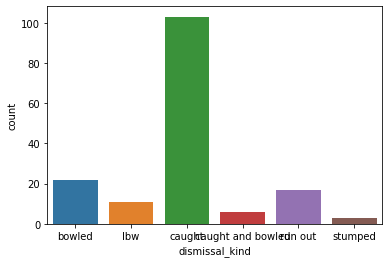

In [387]:
print("number of times bowled:",RGS_b.shape[0])
print("number of times lbw:",RGS_l.shape[0])
print("number of times caught:",RGS_c.shape[0])
print("number of times caught and bowled:",RGS_cb.shape[0])
print("number of times run out:",RGS_ro.shape[0])
print("number of times stumped:",RGS_s.shape[0])

sns.countplot(x= "dismissal_kind", data = RGS_)

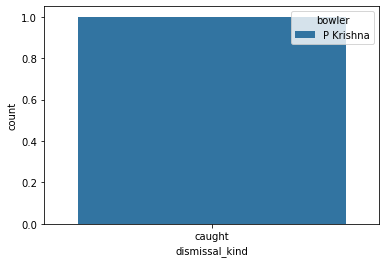

In [388]:
RGS_MI = RGS_[RGS_.bowler.isin(KKR_bowlers)]
sns.countplot(x= "dismissal_kind", hue = "bowler", data = RGS_MI)


## RG sharma will be dismissed from the match with a reason " Caught"